# Pycaret Classification

In [1]:
from pycaret.classification import *

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import f, ttest_ind
from sklearn import datasets
import datetime

In [3]:
#load data
data = pd.read_csv('BitcoinHeistData.csv')
data.rename(columns={'count':'counted'},inplace=True)
data.head()

,address,year,day,length,weight,counted,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,princetonLocky


In [4]:
data.loc[data['label'] == 'white', 'blabel'] = 'white'
data.loc[data['label'] != 'white', 'blabel'] = 'heist'
data.head()

,address,year,day,length,weight,counted,looped,neighbors,income,label,blabel
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,princetonCerber,heist
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,princetonLocky,heist
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,princetonCerber,heist
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,princetonCerber,heist
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,princetonLocky,heist


In [5]:
data['log_income'] = np.log(data['income']+1e-4)
data = data.drop(['address', 'label', 'income'], axis = 1)
data.head()

,year,day,length,weight,counted,looped,neighbors,blabel,log_income
0,2017,11,18,0.008333,1,0,2,heist,18.421181
1,2016,132,44,0.000244,1,0,1,heist,18.420681
2,2016,246,0,1.000000,1,0,2,heist,19.113828
3,2016,322,72,0.003906,1,0,2,heist,18.081003
4,2016,238,144,0.072848,456,0,1,heist,19.113828


### Train with Pycaret

In [6]:
data_train = data.sample(frac = 0.95, random_state = 1)
data_unsee = data.drop(data_train.index)

data_train.reset_index(inplace=True, drop=True)
data_unsee.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(data_train.shape))
print('Unseen Data For Predictions ' + str(data_unsee.shape))

Data for Modeling: (2770862, 9)
Unseen Data For Predictions (145835, 9)


In [7]:
bitcoin_clf = setup(data = data_train, target='blabel', session_id = 1234, 
                    log_experiment=True, experiment_name='bitcoin1', 
                    fix_imbalance = True)

,Description,Value
0,session_id,1234
1,Target,blabel
2,Target Type,Binary
3,Label Encoded,"heist: 0, white: 1"
4,Original Data,"(2770862, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
bitcoin_best = compare_models(include = ['lr', 'svm', 'nb', 'lda'], fold = 5, n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.6544,0.0000,0.6539,0.9935,0.7825,0.0295,0.0885,179.8060
lr,Logistic Regression,0.6428,0.7899,0.6407,0.9953,0.7796,0.0325,0.1055,152.8920
lda,Linear Discriminant Analysis,0.6399,0.7888,0.6377,0.9953,0.7774,0.0321,0.1046,5.5280
nb,Naive Bayes,0.4256,0.7860,0.4181,0.9982,0.5893,0.0174,0.0876,1.9120


In [9]:
print(bitcoin_best)

[SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=1234, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False), LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)]


In [10]:
save_model(bitcoin_best,'Bitcoin Best 21Nov2020')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='blabel',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                   LogisticRegression(C=1.0, class_weight=None, dual=False,
                                      fit_intercept=True, intercept_scaling=1,
                                      l1_ratio=None, max_iter=1000,
                                      multi_class='

### Train SVM

In [11]:
bitcoin_svm = create_model('svm', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7252,0.0000,0.7269,0.9923,0.8391,0.0331,0.0889
1,0.5850,0.0000,0.5817,0.9955,0.7343,0.0261,0.0952
2,0.4693,0.0000,0.4637,0.9957,0.6327,0.0168,0.0767
3,0.7287,0.0000,0.7303,0.9925,0.8415,0.0347,0.0923
4,0.7638,0.0000,0.7668,0.9917,0.8649,0.0366,0.0892
Mean,0.6544,0.0000,0.6539,0.9935,0.7825,0.0295,0.0885
SD,0.1110,0.0000,0.1143,0.0017,0.0875,0.0073,0.0063


In [18]:
tuned_svm = tune_model(bitcoin_svm, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7007,0.0000,0.7036,0.9898,0.8225,0.0185,0.0520
1,0.6115,0.0000,0.6125,0.9894,0.7566,0.0113,0.0385
2,0.7179,0.0000,0.7209,0.9902,0.8344,0.0220,0.0595
3,0.5868,0.0000,0.5873,0.9891,0.7370,0.0093,0.0331
4,0.6877,0.0000,0.6903,0.9899,0.8134,0.0176,0.0511
5,0.6967,0.0000,0.6996,0.9897,0.8198,0.0176,0.0501
6,0.8685,0.0000,0.8765,0.9888,0.9293,0.0387,0.0674
7,0.8733,0.0000,0.8814,0.9889,0.9320,0.0410,0.0702
8,0.7864,0.0000,0.7911,0.9902,0.8795,0.0313,0.0714
9,0.8148,0.0000,0.8209,0.9894,0.8973,0.0306,0.0641


In [26]:
save_model(tuned_svm, 'Bitcoin Tuned SVM 22Nov2020')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='blabel',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                  SGDClassifier(alpha=0.1, average=False, class_weight=None,
                                early_stopping=False, epsilon=0.1, eta0=0.1,
                                fit_intercept=False, l1_ratio=0.7700000001,
                                learning_rat

In [20]:
plot_model(tuned_svm, plot = 'parameter')

,Parameters
alpha,0.1
average,False
class_weight,None
early_stopping,False
epsilon,0.1
eta0,0.1
fit_intercept,False
l1_ratio,0.7700000001
learning_rate,adaptive
loss,hinge


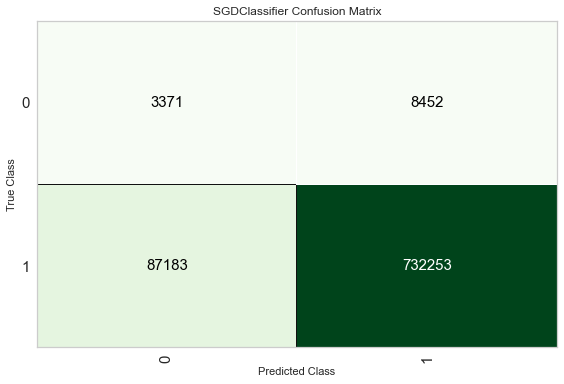

In [46]:
plot_model(tuned_svm, plot = 'confusion_matrix')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

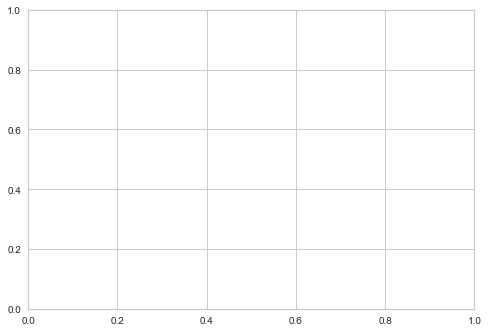

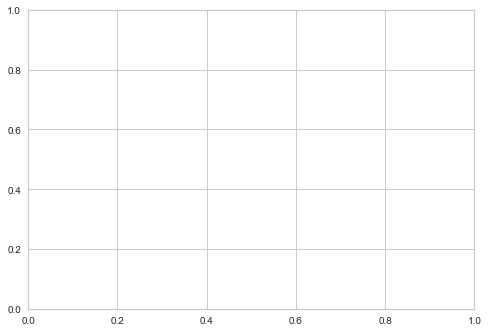

In [47]:
evaluate_model(tuned_svm)

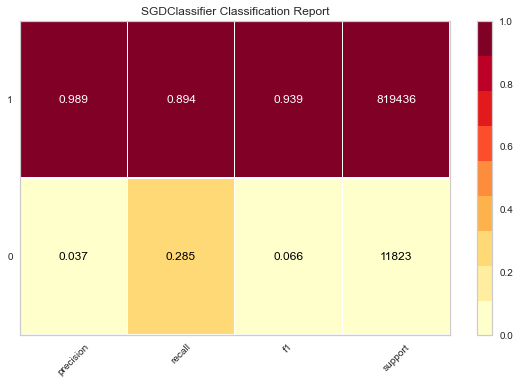

In [49]:
plot_model(tuned_svm, plot = 'class_report')

In [50]:
predict_model(tuned_svm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8850,0.5894,0.8936,0.9886,0.9387,0.0417,0.0679


,day,length,weight,counted,looped,neighbors,log_income,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,blabel,Label
0,139.0,144.0,0.000014,2378.0,0.0,2.0,17.315680,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,white,white
1,345.0,10.0,0.250000,1.0,0.0,1.0,20.950956,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,white,white
2,214.0,22.0,0.062500,1.0,0.0,1.0,17.723881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,white,white
3,124.0,0.0,1.000000,1.0,0.0,1.0,17.216707,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,white,white
4,44.0,0.0,0.500000,1.0,0.0,1.0,19.199093,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,white,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831254,204.0,0.0,1.000000,1.0,0.0,1.0,20.046457,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,white,white
831255,148.0,62.0,0.015625,1.0,0.0,2.0,21.398096,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,white,white
831256,299.0,6.0,0.125000,1.0,0.0,2.0,18.420681,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,white,white
831257,116.0,24.0,0.250000,1.0,0.0,2.0,20.292149,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,white,white


### Train Logistic Regression

In [28]:
bitcoin_lr = create_model('lr', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6430,0.7861,0.6411,0.9950,0.7798,0.0317,0.1025
1,0.6405,0.7943,0.6382,0.9955,0.7778,0.0331,0.1078
2,0.6400,0.7905,0.6378,0.9954,0.7774,0.0324,0.1058
3,0.6466,0.7913,0.6447,0.9952,0.7825,0.0328,0.1056
4,0.6440,0.7872,0.6419,0.9953,0.7804,0.0327,0.1057
Mean,0.6428,0.7899,0.6407,0.9953,0.7796,0.0325,0.1055
SD,0.0024,0.0029,0.0025,0.0002,0.0018,0.0005,0.0017


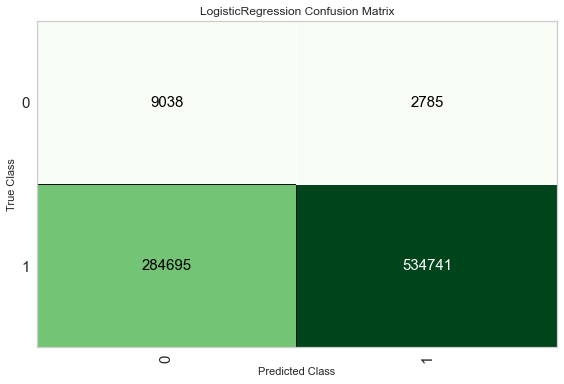

In [33]:
plot_model(bitcoin_lr, plot = 'confusion_matrix')

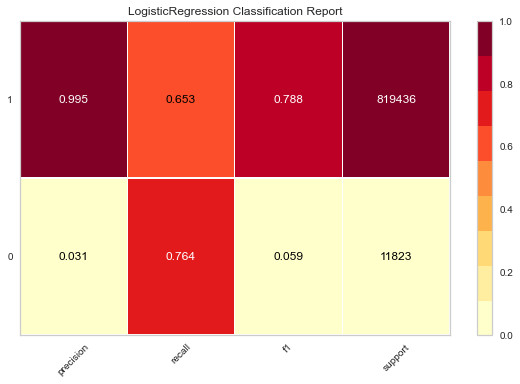

In [43]:
plot_model(bitcoin_lr, plot = 'class_report')

In [48]:
predict_model(bitcoin_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6542,0.7827,0.6526,0.9948,0.7881,0.0327,0.1033


,day,length,weight,counted,looped,neighbors,log_income,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,blabel,Label,Score
0,139.0,144.0,0.000014,2378.0,0.0,2.0,17.315680,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,white,heist,0.7969
1,345.0,10.0,0.250000,1.0,0.0,1.0,20.950956,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,white,heist,0.5101
2,214.0,22.0,0.062500,1.0,0.0,1.0,17.723881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,white,white,0.9823
3,124.0,0.0,1.000000,1.0,0.0,1.0,17.216707,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,white,white,0.5385
4,44.0,0.0,0.500000,1.0,0.0,1.0,19.199093,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,white,white,0.5946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831254,204.0,0.0,1.000000,1.0,0.0,1.0,20.046457,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,white,white,0.6295
831255,148.0,62.0,0.015625,1.0,0.0,2.0,21.398096,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,white,white,0.5000
831256,299.0,6.0,0.125000,1.0,0.0,2.0,18.420681,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,white,heist,0.5816
831257,116.0,24.0,0.250000,1.0,0.0,2.0,20.292149,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,white,white,0.6176


In [42]:
save_model(bitcoin_lr, 'Bitcoin LR 22Nov2020')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='blabel',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=1.0, class_weight=None, dual=False,
                 

### Train Random Forest

In [34]:
bitcoin_rf = create_model('rf', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9776,0.9212,0.9859,0.9914,0.9886,0.3278,0.3323
1,0.9776,0.9234,0.9858,0.9914,0.9886,0.3290,0.3337
2,0.9776,0.9235,0.9858,0.9914,0.9886,0.3286,0.3333
3,0.9773,0.9224,0.9854,0.9915,0.9884,0.3275,0.3327
4,0.9773,0.9205,0.9857,0.9913,0.9884,0.3195,0.3240
Mean,0.9775,0.9222,0.9857,0.9914,0.9885,0.3265,0.3312
SD,0.0002,0.0012,0.0002,0.0001,0.0001,0.0035,0.0036


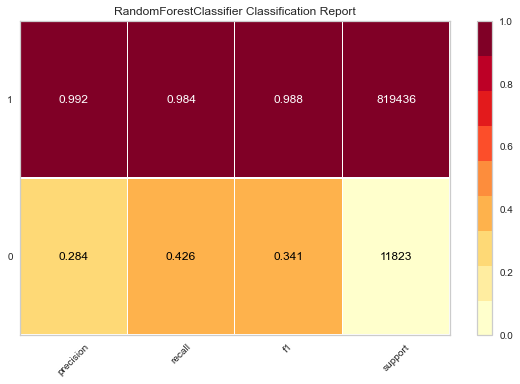

In [40]:
plot_model(bitcoin_rf, plot = 'class_report')

In [45]:
predict_model(bitcoin_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9765,0.9229,0.9845,0.9917,0.9881,0.3291,0.3361


,day,length,weight,counted,looped,neighbors,log_income,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,blabel,Label,Score
0,139.0,144.0,0.000014,2378.0,0.0,2.0,17.315680,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,white,white,0.99
1,345.0,10.0,0.250000,1.0,0.0,1.0,20.950956,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,white,white,1.00
2,214.0,22.0,0.062500,1.0,0.0,1.0,17.723881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,white,white,1.00
3,124.0,0.0,1.000000,1.0,0.0,1.0,17.216707,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,white,white,1.00
4,44.0,0.0,0.500000,1.0,0.0,1.0,19.199093,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,white,white,0.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831254,204.0,0.0,1.000000,1.0,0.0,1.0,20.046457,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,white,white,1.00
831255,148.0,62.0,0.015625,1.0,0.0,2.0,21.398096,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,white,white,1.00
831256,299.0,6.0,0.125000,1.0,0.0,2.0,18.420681,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,white,white,0.82
831257,116.0,24.0,0.250000,1.0,0.0,2.0,20.292149,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,white,white,1.00


In [44]:
save_model(bitcoin_rf, 'Bitcoin RF 22NOV2020')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='blabel',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         max_l

In [ ]:
interpret_model(bitcoin_rf)